<a href="https://colab.research.google.com/github/Delcapa/BDA_6th/blob/main/Feature(230827).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 23.08.27 필수과제
* 본인이 생각하는 y값과 연관이 있는 피처들은 무엇인지에 대한 기준을 정해서 정리해 주세요!
* 코드로 시각화 및 통계적인 분석 등 다양하게 접근하셔서 Y값과 컬럼들간의 유의미한 차이를 확인해 주세요!

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/train_bk.csv")

In [ ]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
train.isna().sum()
# NaN인 값은 없어보임

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### 우선 날짜 전처리부터

In [ ]:
train["datetime"][100].split()

['2011-01-05', '09:00:00']

In [ ]:
train["date"] = train["datetime"].apply(lambda x:x.split()[0]) # 날짜 피처셋

In [ ]:
train["year"] = train["datetime"].apply(lambda x:x.split("-")[0])
train["month"] = train["datetime"].apply(lambda x:x.split("-")[1])
train["day"] = train["datetime"].apply(lambda x:x.split()[0].split("-")[2])

In [ ]:
train["hour"] = train["datetime"].apply(lambda x:x.split()[1].split(":")[0])
# minute과 second는 00으로 설정되어있으니 따로 만들지 않는다

In [ ]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,01,01,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,01,01,01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,01,01,02
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,01,01,03
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,01,01,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22


In [ ]:
from datetime import datetime
import calendar
# 요일

In [ ]:
train["weekday"] = train["date"].apply(lambda dateString:calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()])

In [ ]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,01,01,00,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,01,01,01,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,01,01,02,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,01,01,03,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,01,01,04,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,Wednesday


In [ ]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'date', 'year', 'month', 'day', 'hour', 'weekday'],
      dtype='object')

In [ ]:
column_seq = ['datetime', 'date', 'year', 'month', 'day', 'hour', 'weekday','season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

train = train[column_seq]

train # 열 순서 변경 (슬라이싱)

,datetime,date,year,month,day,hour,weekday,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,2011-01-01,2011,01,01,00,Saturday,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,2011-01-01,2011,01,01,01,Saturday,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,2011-01-01,2011,01,01,02,Saturday,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,2011-01-01,2011,01,01,03,Saturday,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,2011-01-01,2011,01,01,04,Saturday,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,2012-12-19,2012,12,19,19,Wednesday,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,2012-12-19,2012,12,19,20,Wednesday,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,2012-12-19,2012,12,19,21,Wednesday,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,2012-12-19,2012,12,19,22,Wednesday,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   date        10886 non-null  object 
 2   year        10886 non-null  object 
 3   month       10886 non-null  object 
 4   day         10886 non-null  object 
 5   hour        10886 non-null  object 
 6   weekday     10886 non-null  object 
 7   season      10886 non-null  int64  
 8   holiday     10886 non-null  int64  
 9   workingday  10886 non-null  int64  
 10  weather     10886 non-null  int64  
 11  temp        10886 non-null  float64
 12  atemp       10886 non-null  float64
 13  humidity    10886 non-null  int64  
 14  windspeed   10886 non-null  float64
 15  casual      10886 non-null  int64  
 16  registered  10886 non-null  int64  
 17  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(7)
memory usage: 1.5+ MB


In [ ]:
train =train.astype({'year':"int64", 'month':"int64", 'day':"int64", 'hour':"int64"})
train.info()
# heatmap을 위해 속성 변경

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   date        10886 non-null  object 
 2   year        10886 non-null  int64  
 3   month       10886 non-null  int64  
 4   day         10886 non-null  int64  
 5   hour        10886 non-null  int64  
 6   weekday     10886 non-null  object 
 7   season      10886 non-null  int64  
 8   holiday     10886 non-null  int64  
 9   workingday  10886 non-null  int64  
 10  weather     10886 non-null  int64  
 11  temp        10886 non-null  float64
 12  atemp       10886 non-null  float64
 13  humidity    10886 non-null  int64  
 14  windspeed   10886 non-null  float64
 15  casual      10886 non-null  int64  
 16  registered  10886 non-null  int64  
 17  count       10886 non-null  int64  
dtypes: float64(3), int64(12), object(3)
memory usage: 1.5+ MB


### 그래프 시각화

In [ ]:
train.groupby("season")["count"].mean()
# season에 따른 count 평균

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64

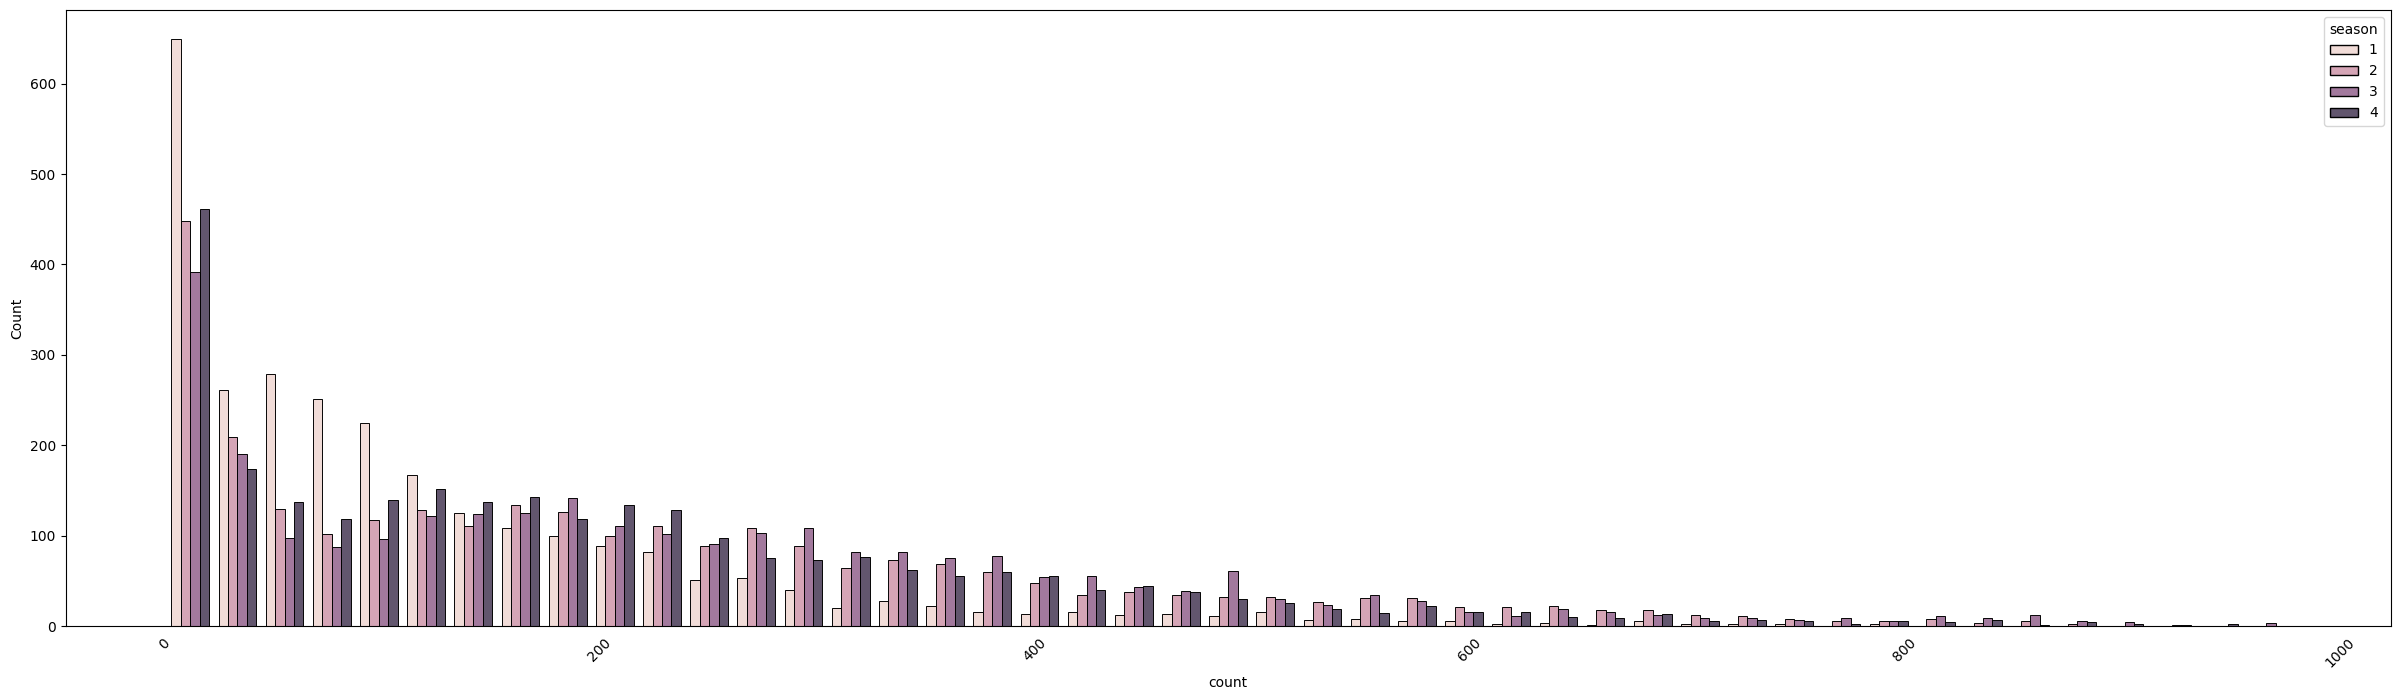

In [ ]:
plt.figure(figsize=(30,8))

ax = sns.histplot(x='count', hue='season',
                  multiple='dodge', # 누적 막대그래프 그리기
                  shrink=0.8, # 막대 사이 간격 조정
                  data=train)
ax.tick_params(bottom=False) # x축 눈금 숨기기

plt.xticks(rotation=45)
plt.show()
# season에 따른 count의 데이터 분포

* season의 경우 1의 count 데이터 분포는 낮은 쪽에 몰려있다.
* 2,3,4는 비슷한 분포를 보인다.

In [ ]:
train.groupby("holiday")["count"].mean()

holiday
0    191.741655
1    185.877814
Name: count, dtype: float64

In [ ]:
train.groupby("holiday")["count"].count()

holiday
0    10575
1      311
Name: count, dtype: int64

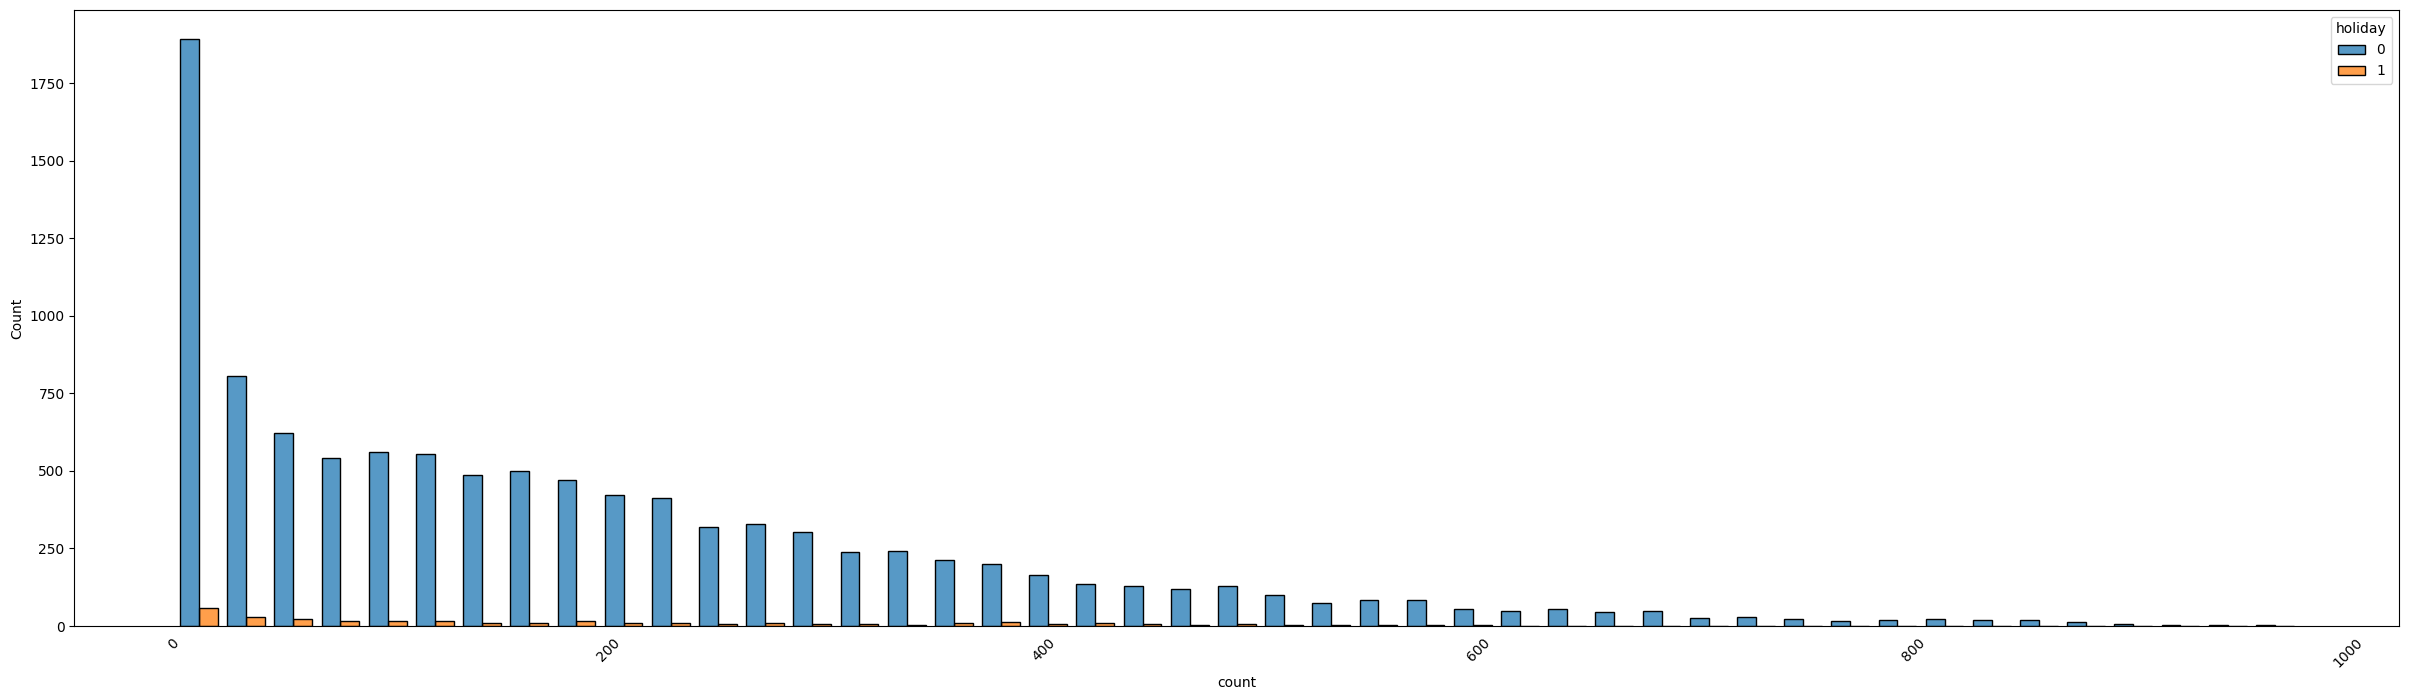

In [ ]:
plt.figure(figsize=(30,8))

ax = sns.histplot(x='count', hue='holiday',
                  multiple='dodge', # 누적 막대그래프 그리기
                  shrink=0.8, # 막대 사이 간격 조정
                  data=train)
ax.tick_params(bottom=False) # x축 눈금 숨기기

plt.xticks(rotation=45)
plt.show()
# holiday에 따른 count 분포

* holiday의 경우 1의 데이터 수는 적지만 count 비율에서 큰 차이를 보이지는 않음
* holiday일수록 대여 수가 적어짐

In [ ]:
train.groupby("workingday")["count"].mean()

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

In [ ]:
train.groupby("workingday")["count"].count()

workingday
0    3474
1    7412
Name: count, dtype: int64

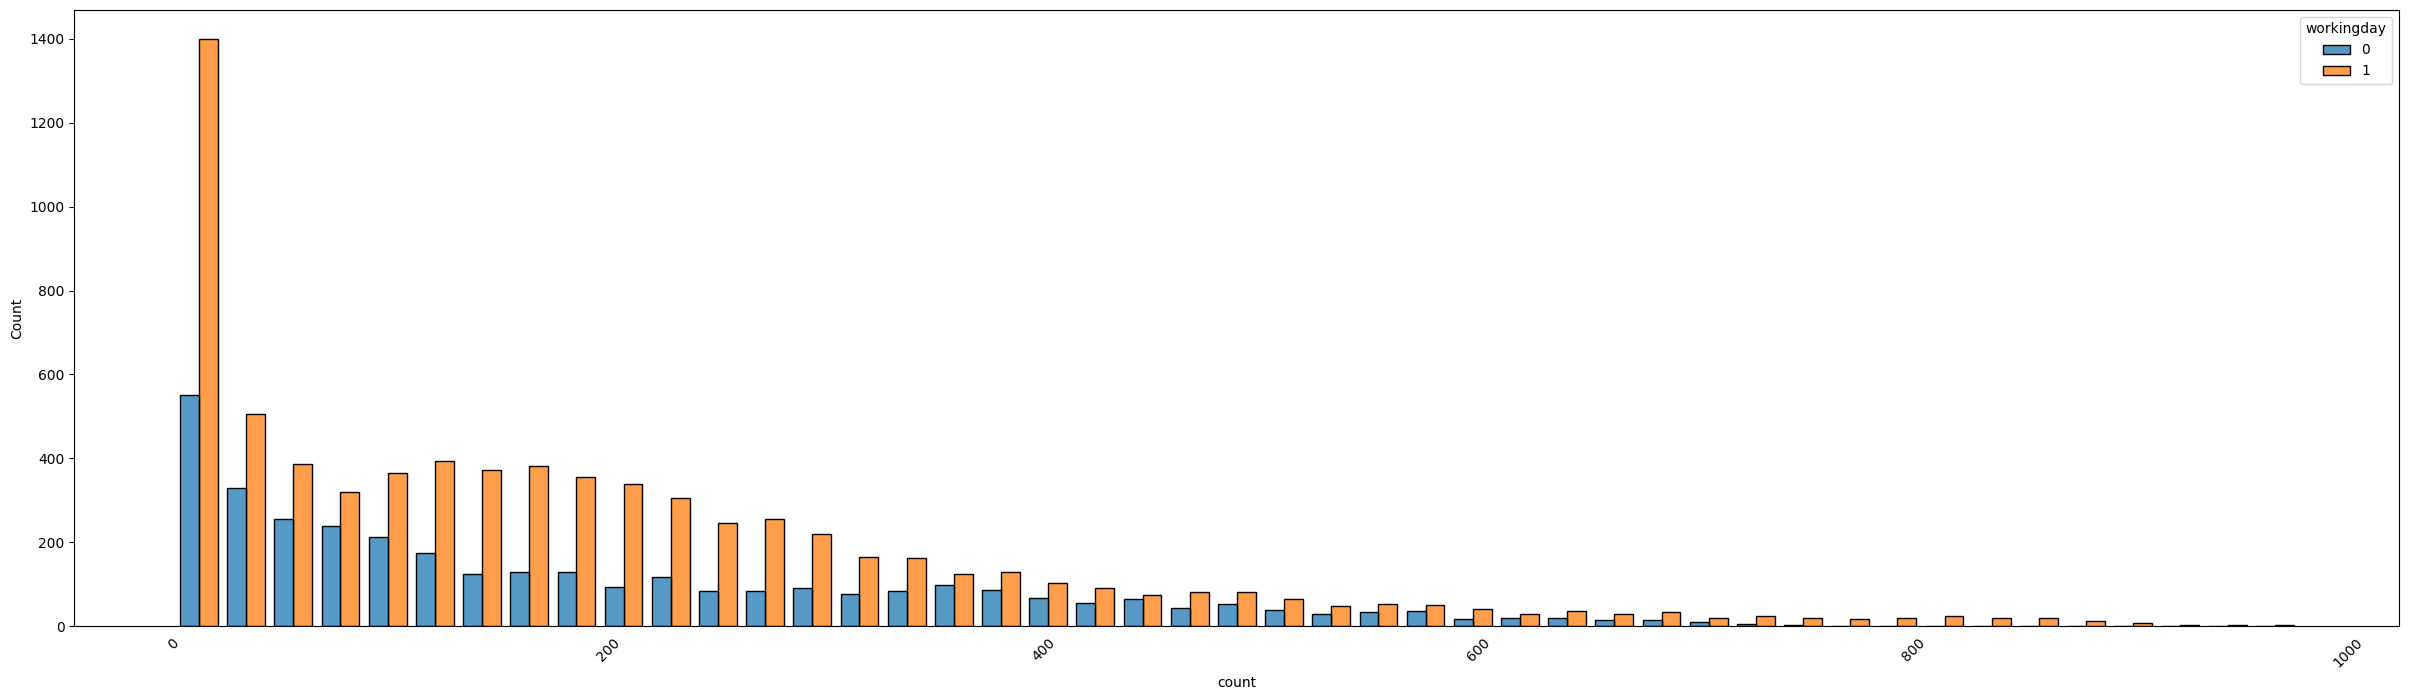

In [ ]:
plt.figure(figsize=(30,8))

ax = sns.histplot(x='count', hue='workingday',
                  multiple='dodge', # 누적 막대그래프 그리기
                  shrink=0.8, # 막대 사이 간격 조정
                  data=train)
ax.tick_params(bottom=False) # x축 눈금 숨기기

plt.xticks(rotation=45)
plt.show()
# workingday에 따른 count분포

* workingday: 일하는 날이 그렇지 않은 날보다 자전거 대여가 많지만 큰 차이는 없음

In [ ]:
train.groupby("weather")["count"].mean()

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64

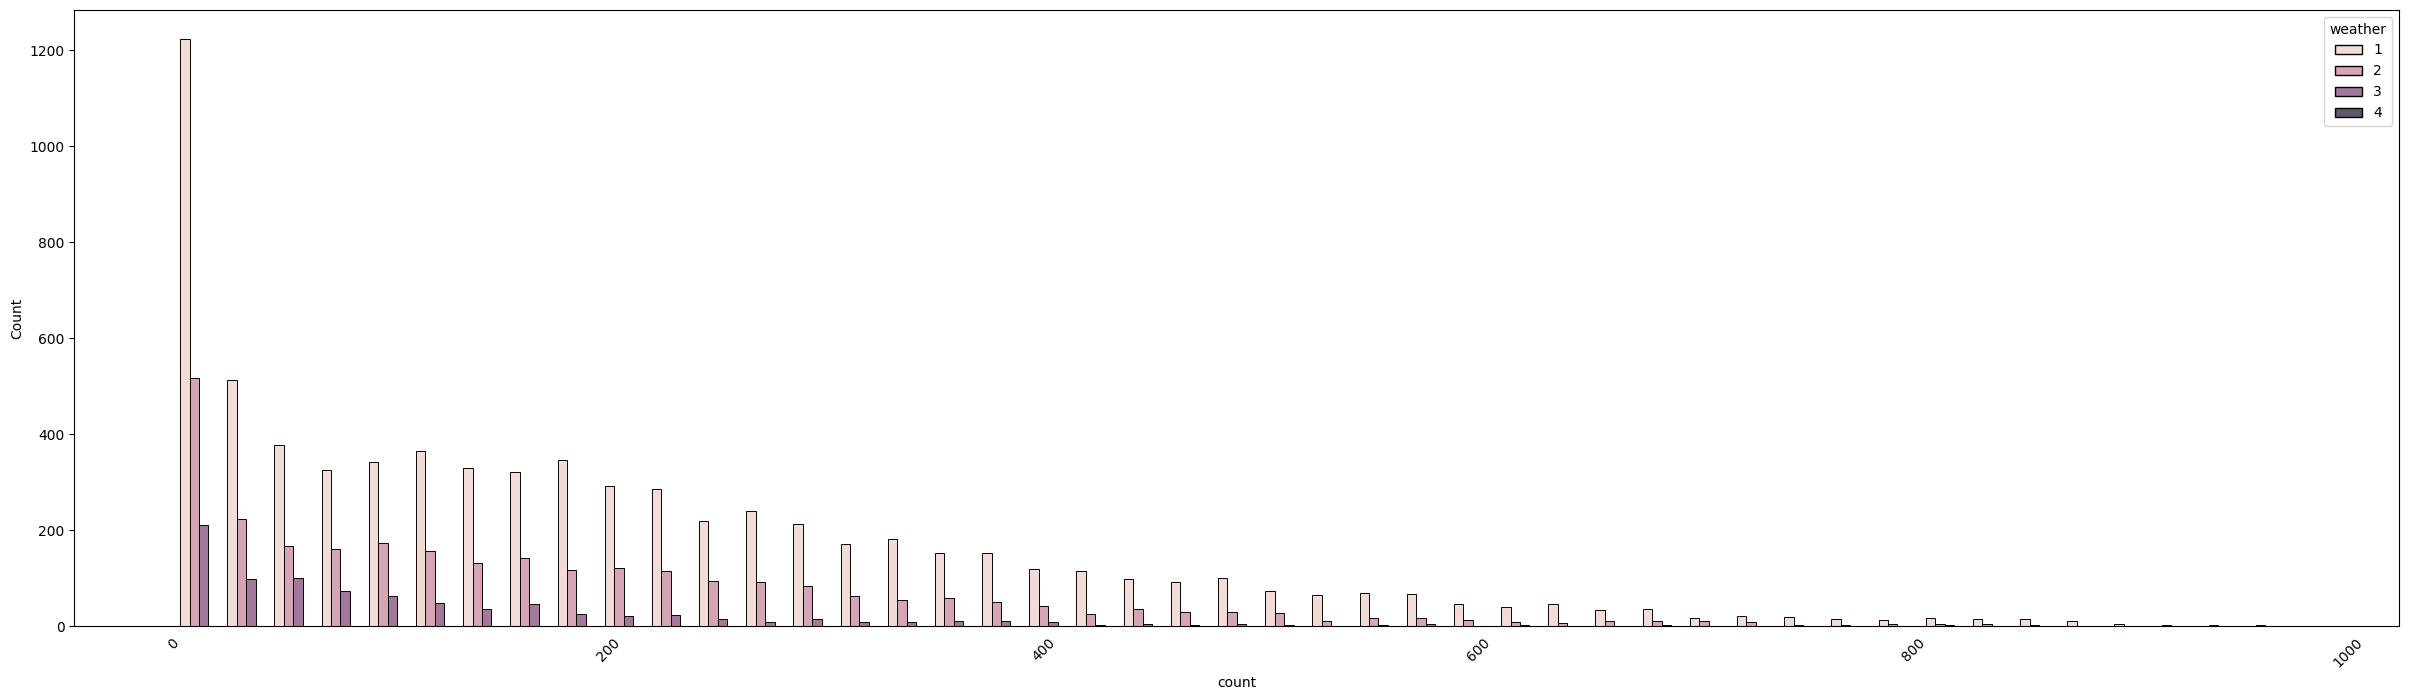

In [ ]:
plt.figure(figsize=(30,8))

ax = sns.histplot(x='count', hue='weather',
                  multiple='dodge', # 누적 막대그래프 그리기
                  shrink=0.8, # 막대 사이 간격 조정
                  data=train)
ax.tick_params(bottom=False) # x축 눈금 숨기기

plt.xticks(rotation=45)
plt.show()
# weather에 따른 count분포

In [ ]:
train.groupby("humidity")["count"].mean()

humidity
0       28.318182
8       77.000000
10     107.000000
12      29.000000
13      17.000000
          ...    
93      71.151220
94      88.475309
96      71.000000
97      64.000000
100     66.493243
Name: count, Length: 89, dtype: float64

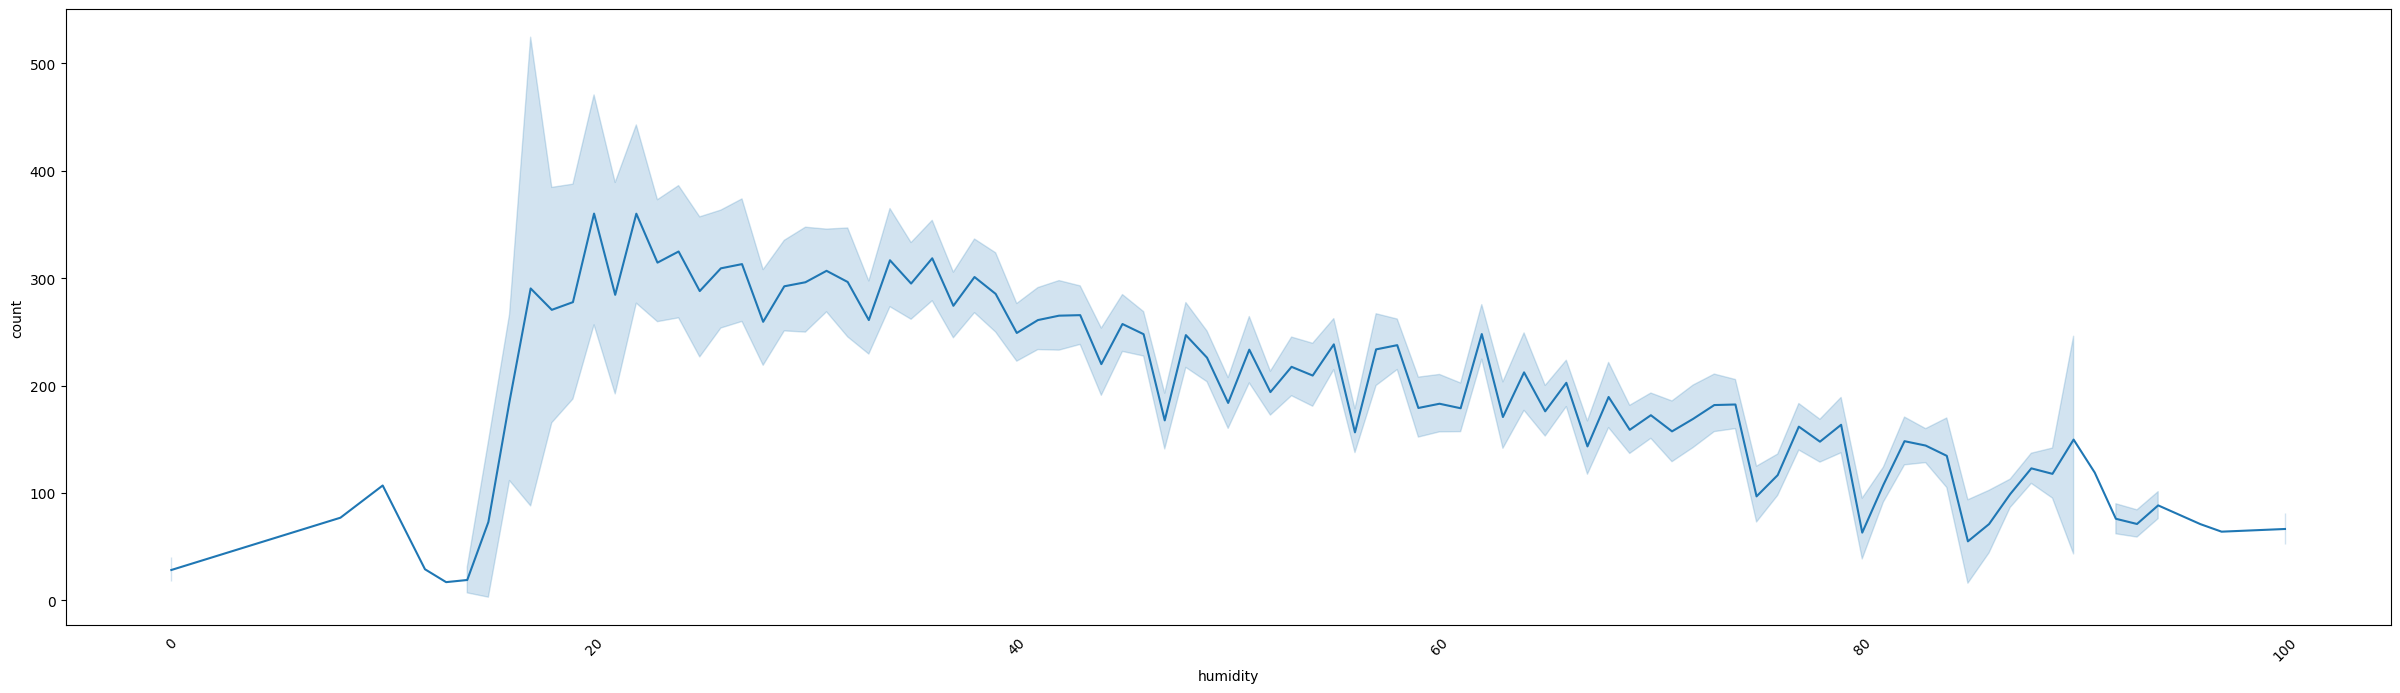

In [ ]:
plt.figure(figsize=(30,8))

ax = sns.lineplot(x='humidity', y= 'count',
                   # 막대 사이 간격 조정
                  data=train)
ax.tick_params(bottom=False) # x축 눈금 숨기기

plt.xticks(rotation=45)
plt.show()
# humidity에 따른 count 변화

In [ ]:
train.groupby("windspeed")["count"].mean()

windspeed
0.0000     161.101295
6.0032     147.864679
7.0015     169.852031
8.9981     175.645536
11.0014    202.262062
12.9980    202.249520
15.0013    210.833507
16.9979    214.847087
19.0012    218.051775
19.9995    225.235772
22.0028    185.053763
23.9994    220.010949
26.0027    228.744681
27.9993    219.363636
30.0026    217.171171
31.0009    208.955056
32.9975    184.075000
35.0008    230.155172
36.9974    197.045455
39.0007    176.888889
40.9973    189.363636
43.0006    137.916667
43.9989    192.375000
46.0022     67.333333
47.9988    140.500000
50.0021    171.000000
51.9987      5.000000
56.9969    269.500000
Name: count, dtype: float64

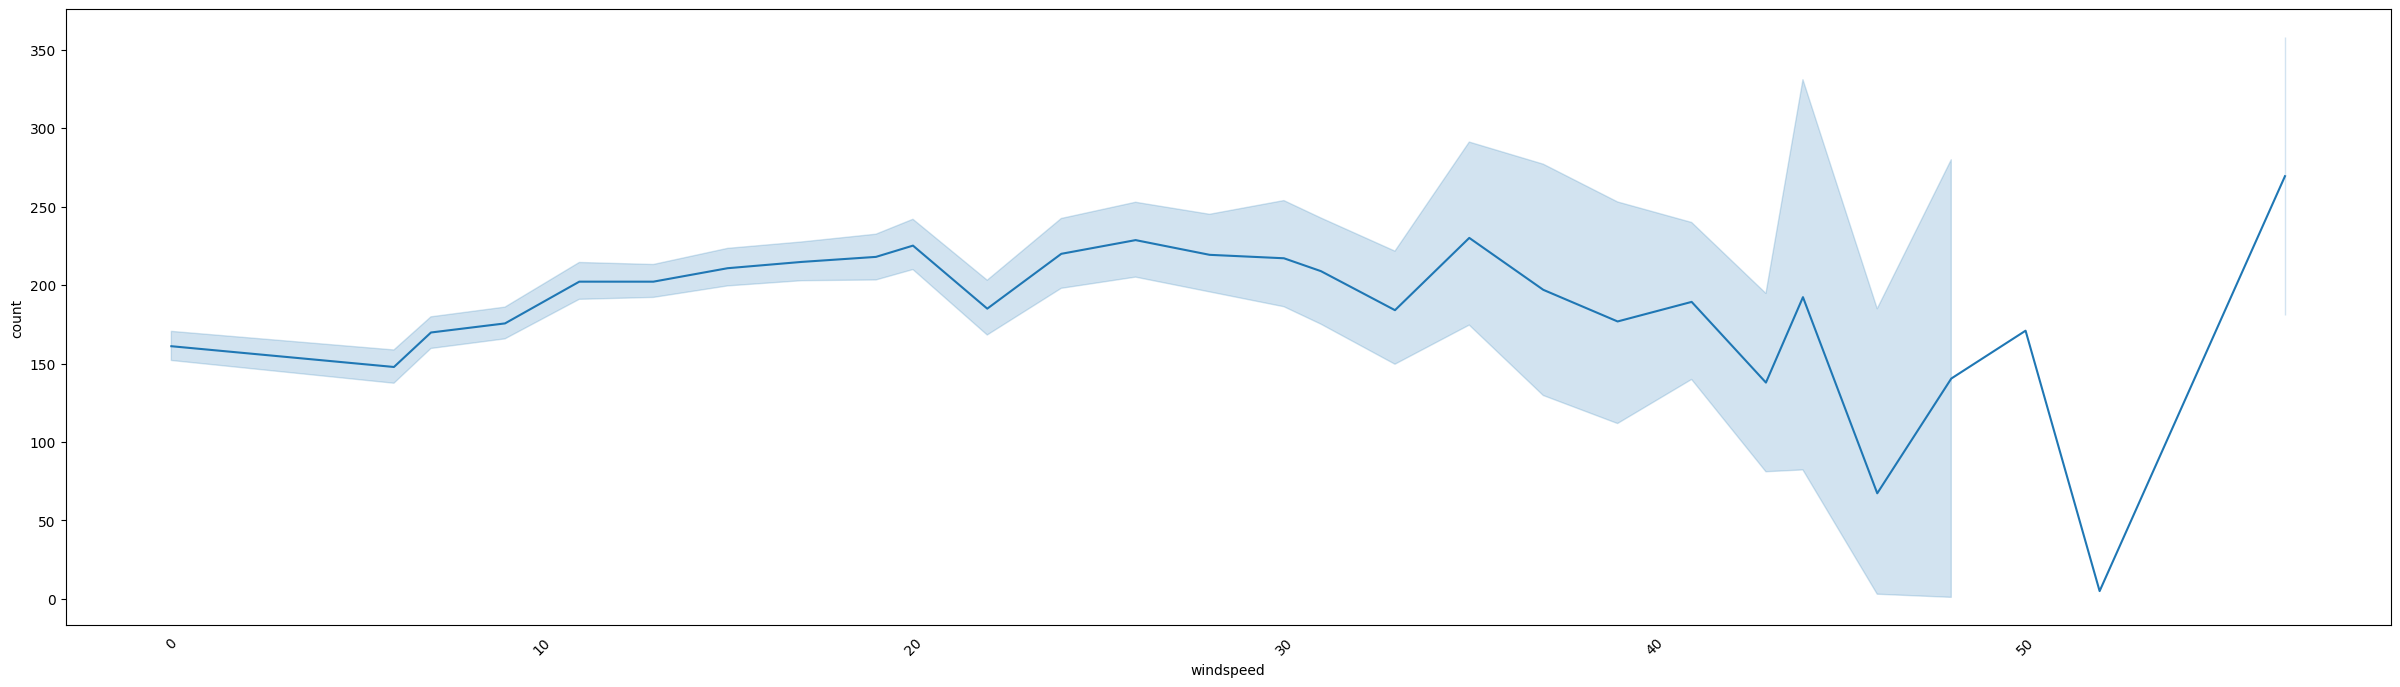

In [ ]:
plt.figure(figsize=(30,8))

ax = sns.lineplot(x='windspeed', y= 'count',
                   # 막대 사이 간격 조정
                  data=train)
ax.tick_params(bottom=False) # x축 눈금 숨기기

plt.xticks(rotation=45)
plt.show()
# workclass에 따른 임금자들의 비율

In [ ]:
train.groupby("casual")["count"].mean()

casual
0       12.986815
1       26.523238
2       36.318275
3       57.057078
4       69.697740
          ...    
356    672.000000
357    679.000000
361    730.000000
362    743.000000
367    685.000000
Name: count, Length: 309, dtype: float64

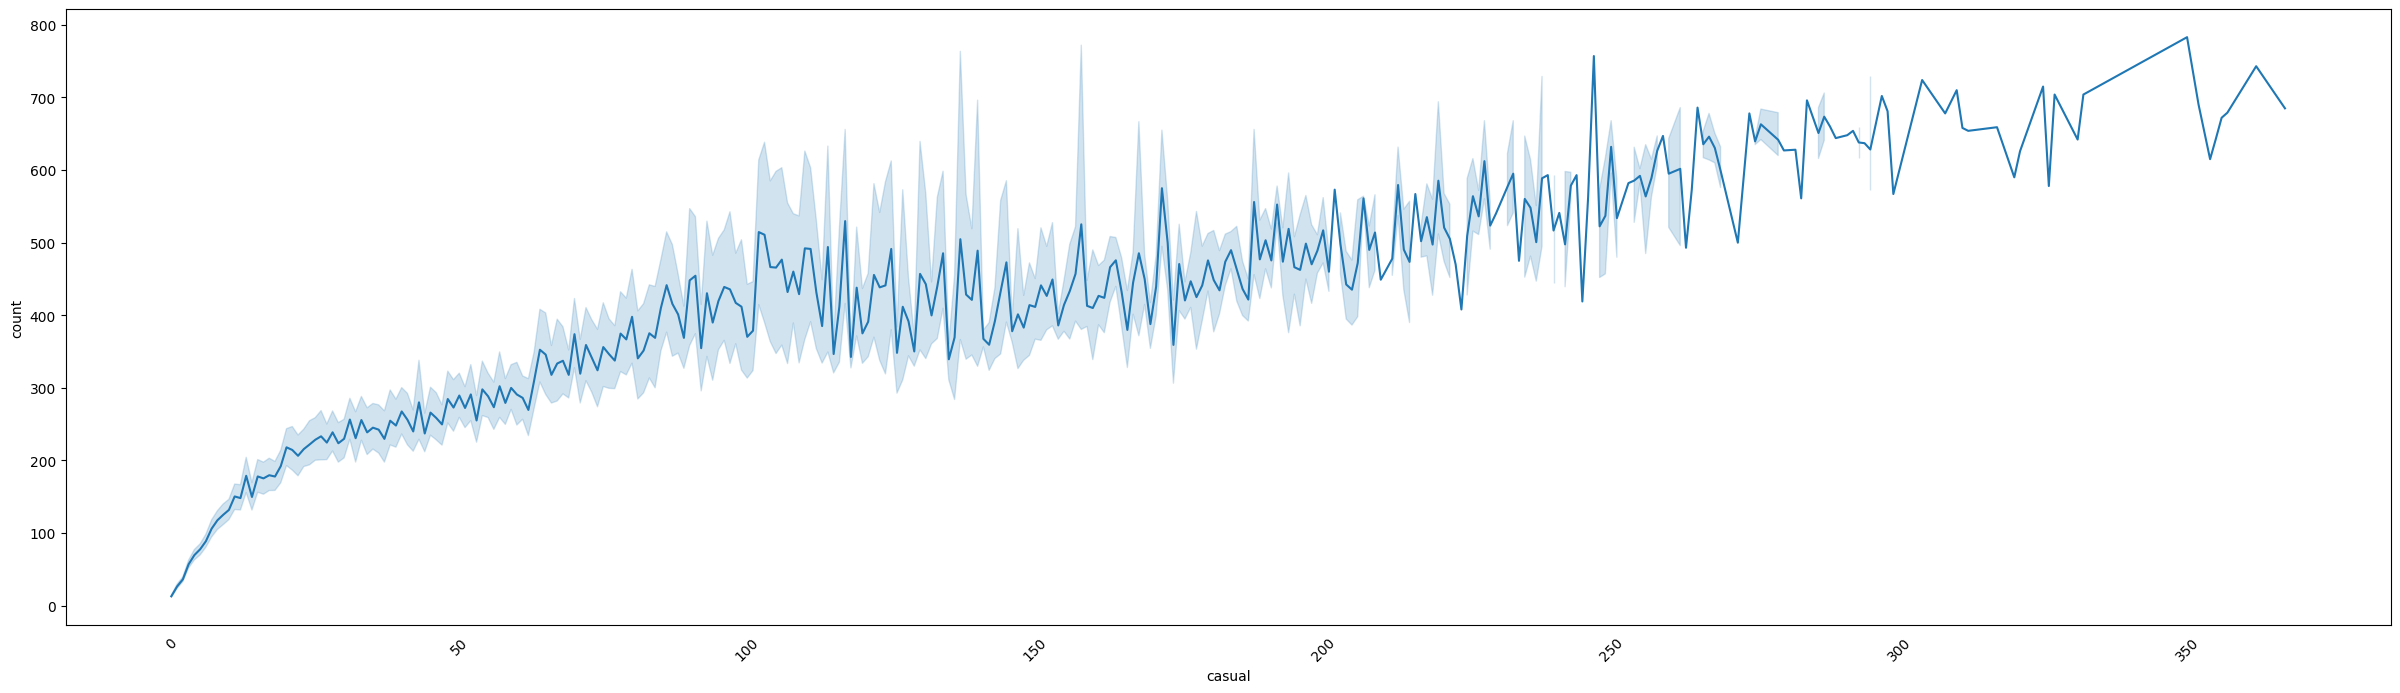

In [ ]:
plt.figure(figsize=(30,8))

ax = sns.lineplot(x='casual', y= 'count',
                   # 막대 사이 간격 조정
                  data=train)
ax.tick_params(bottom=False) # x축 눈금 숨기기

plt.xticks(rotation=45)
plt.show()
# casual에 따른 count

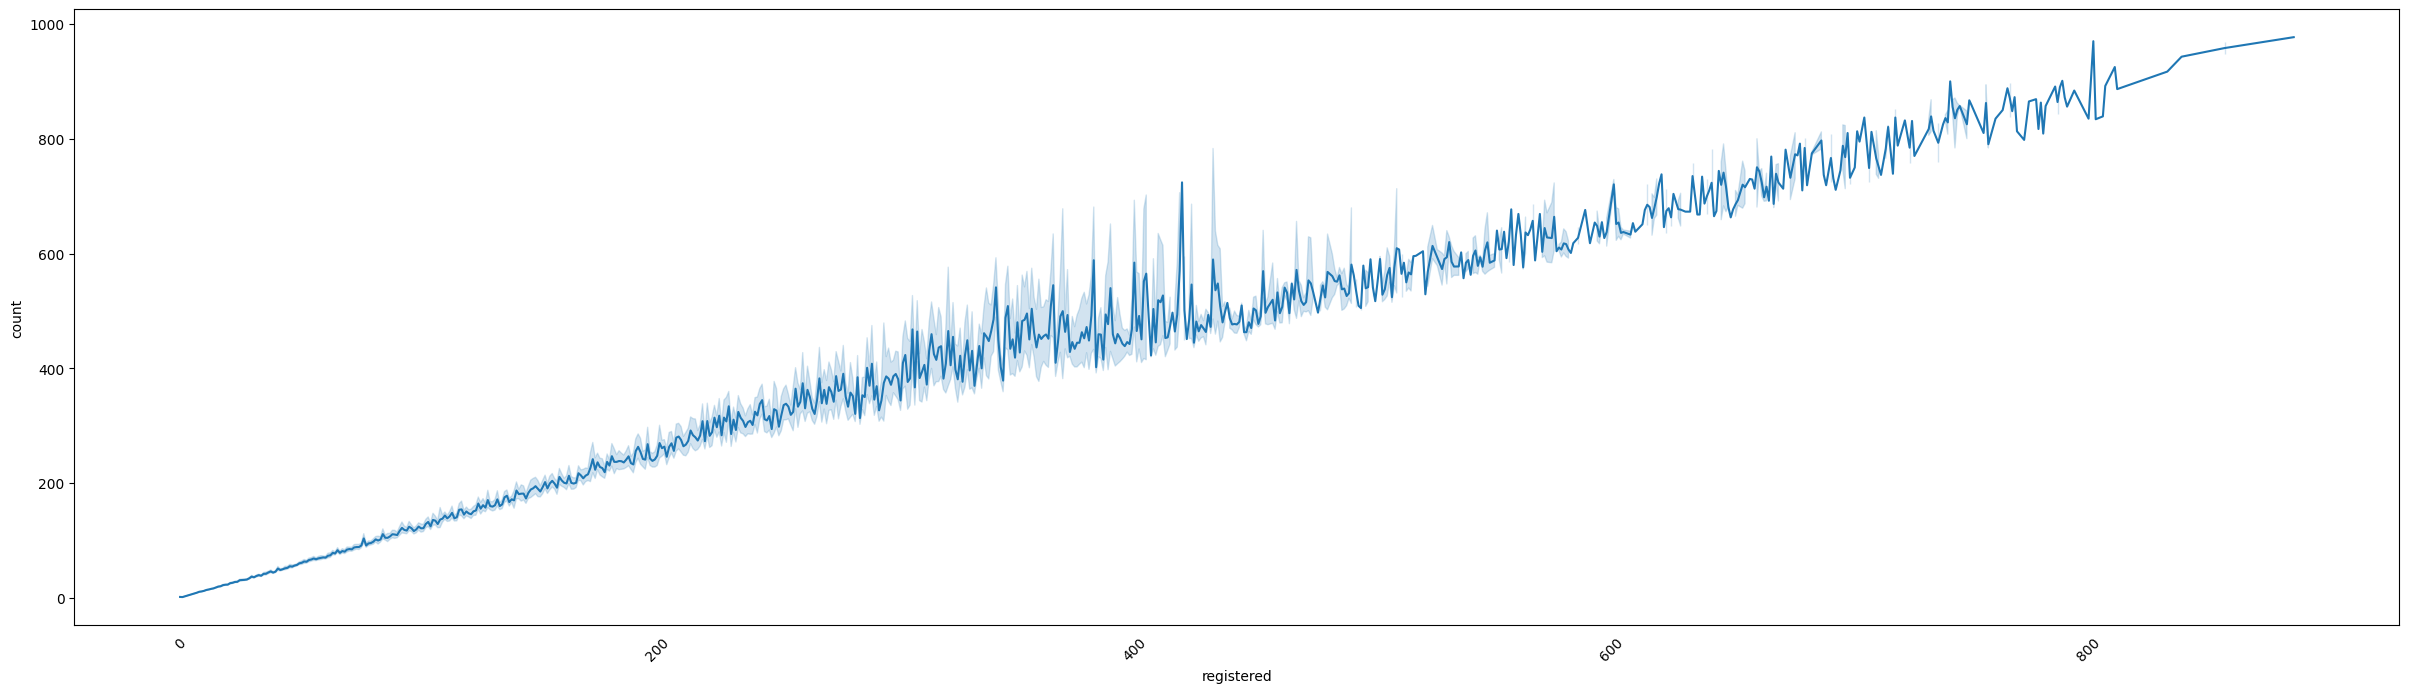

In [ ]:
plt.figure(figsize=(30,8))

ax = sns.lineplot(x='registered', y= 'count',
                   # 막대 사이 간격 조정
                  data=train)
ax.tick_params(bottom=False) # x축 눈금 숨기기

plt.xticks(rotation=45)
plt.show()
# registered에 따른 count

In [ ]:
train.groupby("date")["count"].mean()

date
2011-01-01     41.041667
2011-01-02     34.826087
2011-01-03     61.318182
2011-01-04     67.913043
2011-01-05     69.565217
                 ...    
2012-12-15    210.291667
2012-12-16    157.750000
2012-12-17    191.041667
2012-12-18    231.541667
2012-12-19    219.458333
Name: count, Length: 456, dtype: float64

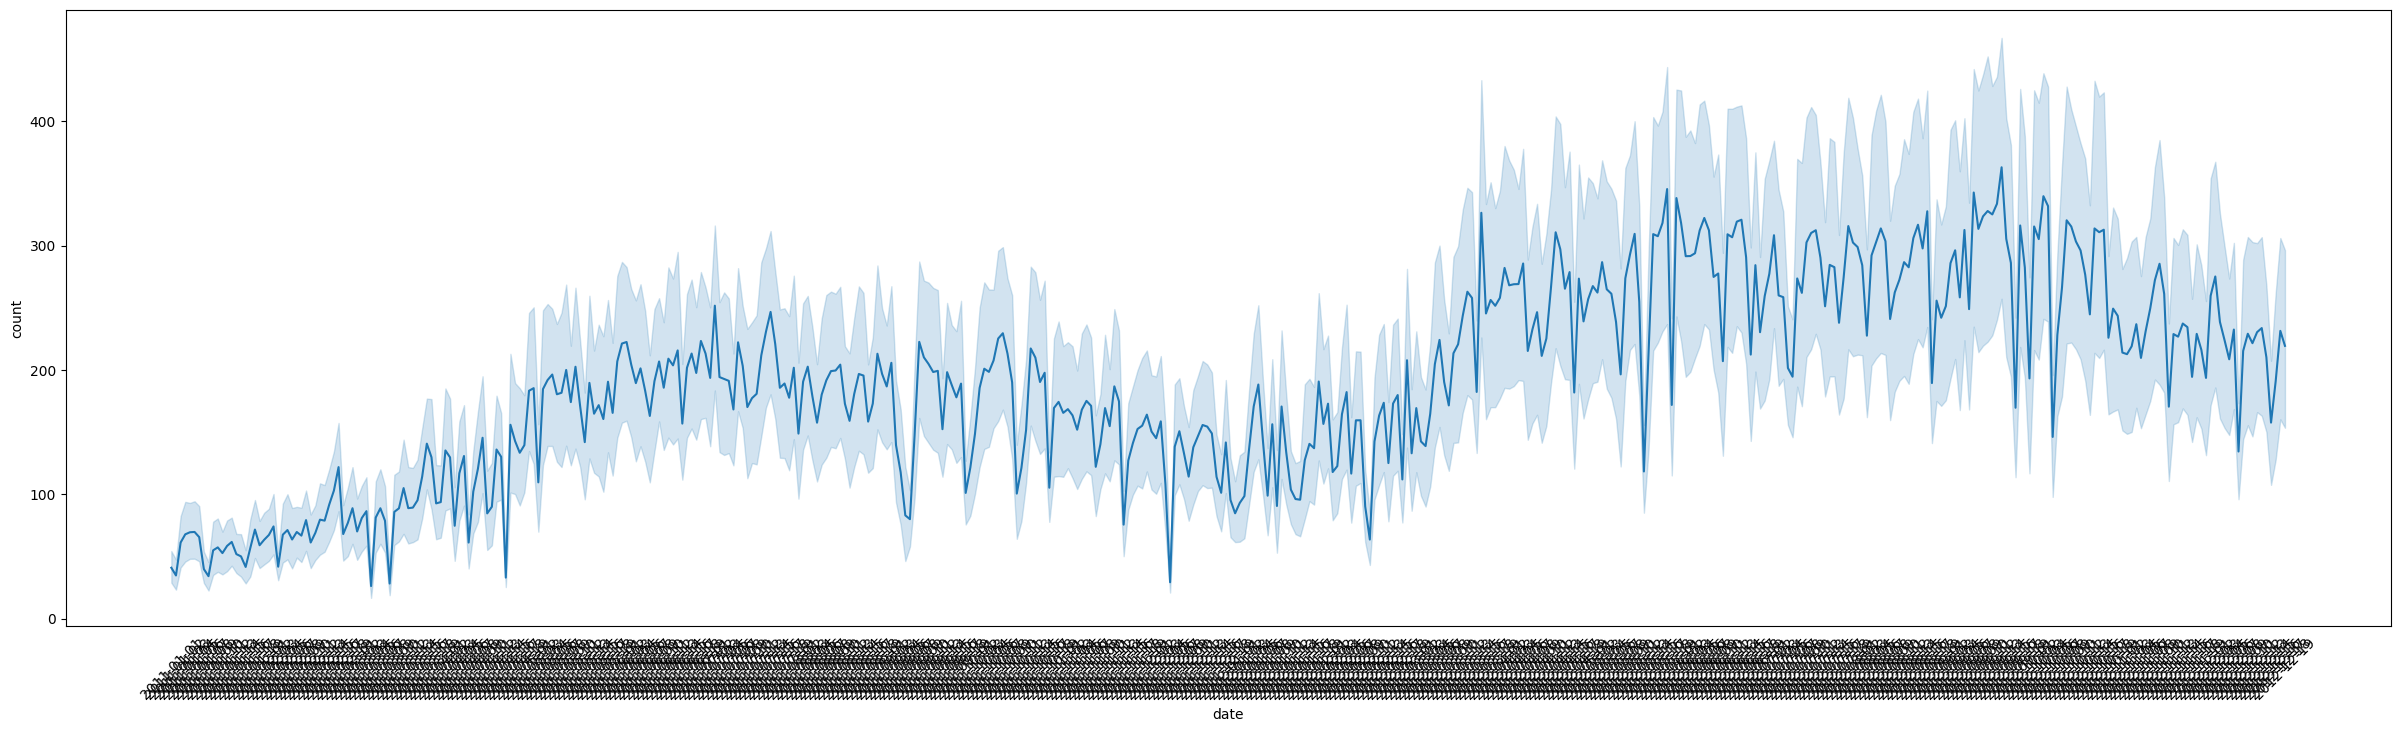

In [ ]:
plt.figure(figsize=(30,8))

ax = sns.lineplot(x='date', y= 'count',
                   # 막대 사이 간격 조정
                  data=train)
ax.tick_params(bottom=False) # x축 눈금 숨기기

plt.xticks(rotation=45)
plt.show()
# date에 따른 count 분포

In [ ]:
train.groupby("year")["count"].mean()

year
2011    144.223349
2012    238.560944
Name: count, dtype: float64

In [ ]:
train.groupby("year")["count"].count()

year
2011    5422
2012    5464
Name: count, dtype: int64

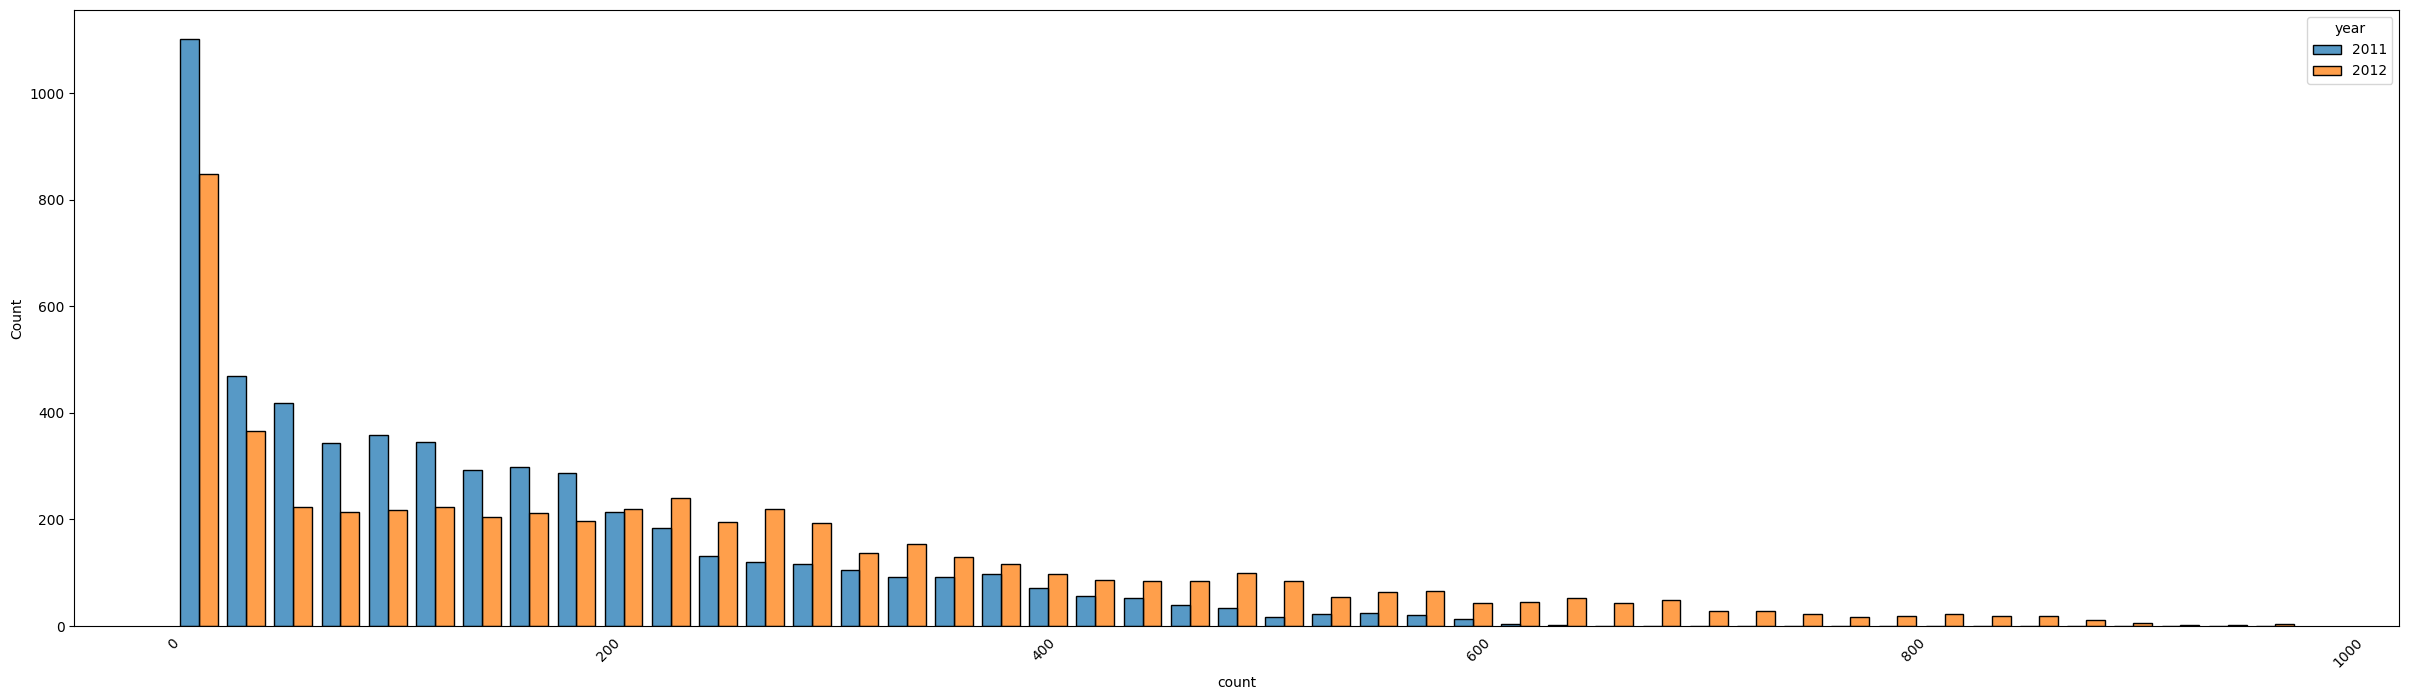

In [ ]:
plt.figure(figsize=(30,8))

ax = sns.histplot(x='count', hue='year',
                  multiple='dodge', # 누적 막대그래프 그리기
                  shrink=0.8, # 막대 사이 간격 조정
                  data=train)
ax.tick_params(bottom=False) # x축 눈금 숨기기

plt.xticks(rotation=45)
plt.show()
# year별 count분포

* 2012년도가 2011년도에 비하여 평균적으로 count가 늘었으며
* 데이터 수는 비슷함에도 데이터의 상당수가 2011년도에 비해 높은 count에 더 많이 분포되어있음

In [ ]:
train.groupby("month")["count"].mean()

month
01     90.366516
02    110.003330
03    148.169811
04    184.160616
05    219.459430
06    242.031798
07    235.325658
08    234.118421
09    233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64

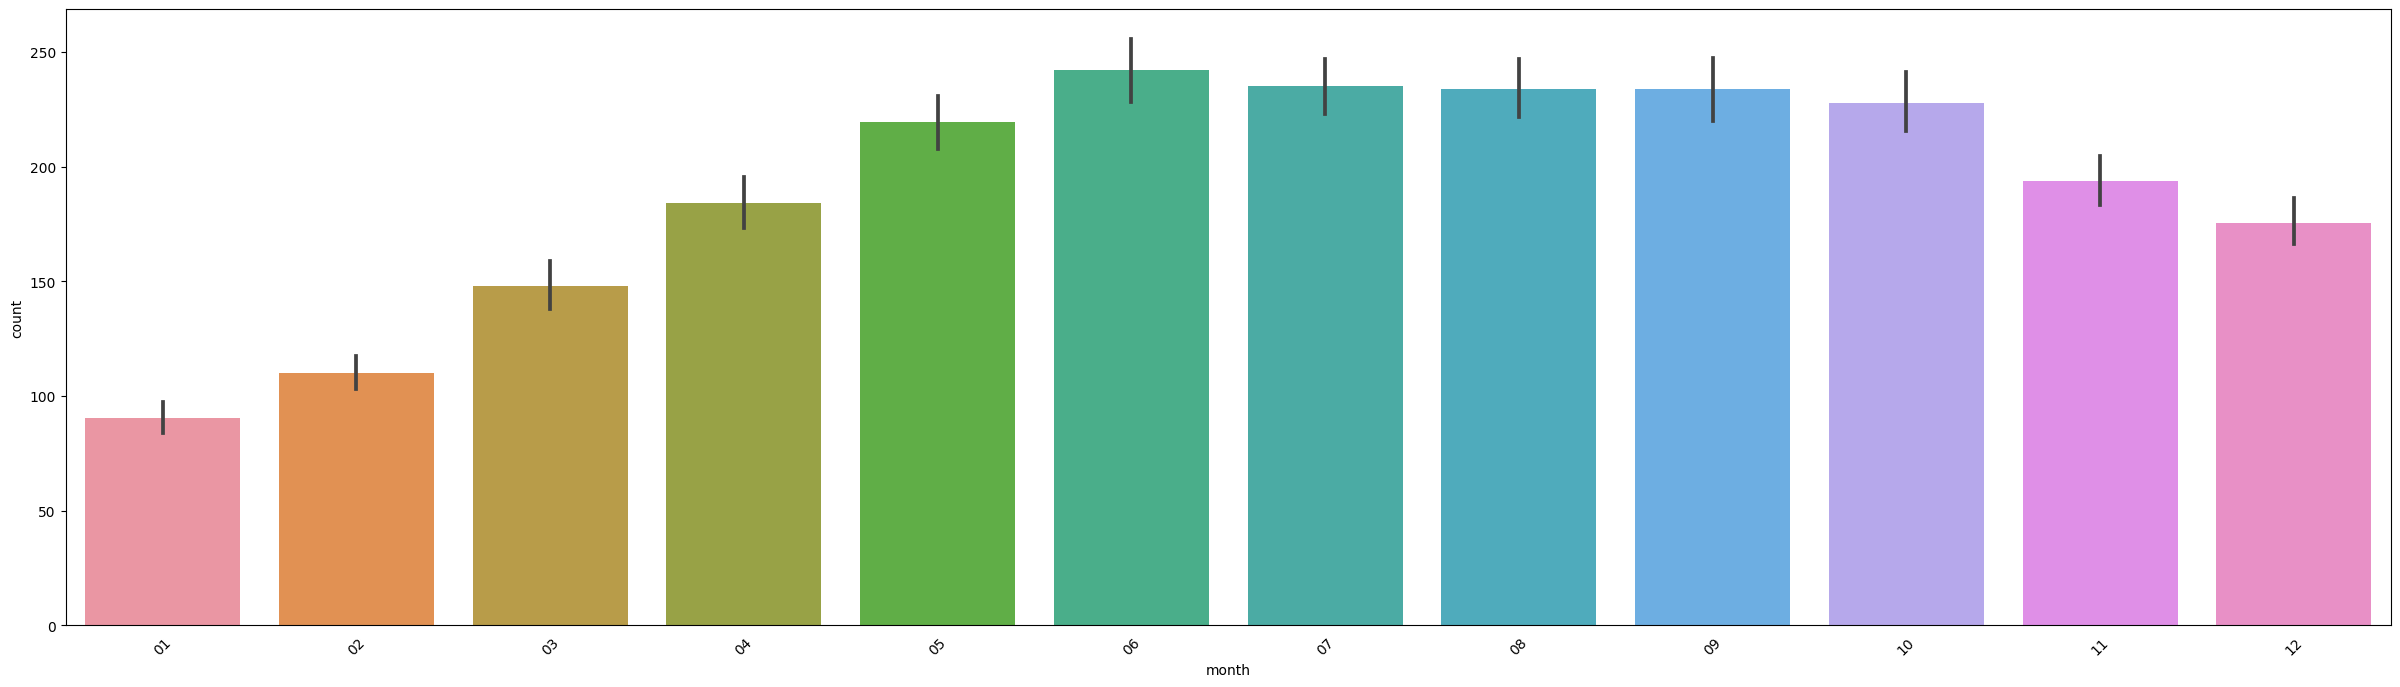

In [ ]:
plt.figure(figsize=(30,8))

ax = sns.barplot(x='month', y='count',
                  data=train)
ax.tick_params(bottom=False) # x축 눈금 숨기기

plt.xticks(rotation=45)
plt.show()
# month별 count평균

* month별 차이 존재
* month 유의미하게 count 영향을 주는 피쳐

In [ ]:
train.groupby("day")["count"].mean()

day
01    180.333913
02    183.910995
03    194.696335
04    195.705575
05    189.765217
06    189.860140
07    183.773519
08    179.041812
09    187.897391
10    195.183566
11    195.679577
12    190.675393
13    194.160279
14    195.829268
15    201.527875
16    191.353659
17    205.660870
18    192.605684
19    192.311847
Name: count, dtype: float64

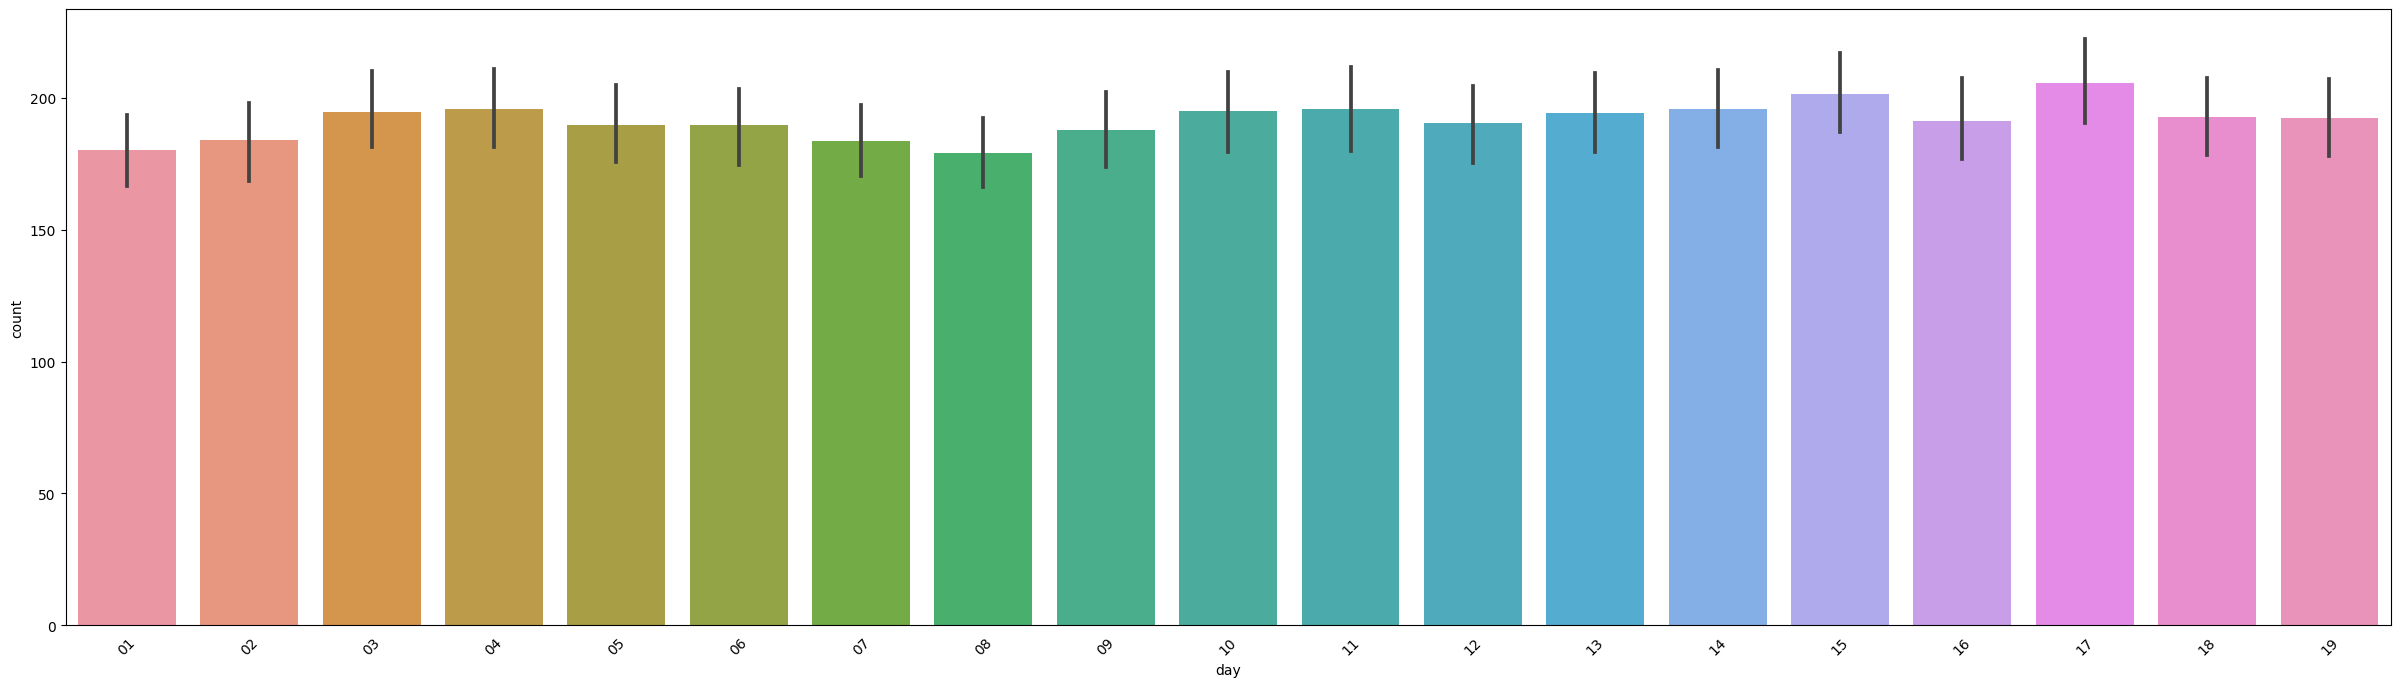

In [ ]:
plt.figure(figsize=(30,8))

ax = sns.barplot(x='day', y='count',
                  data=train)
ax.tick_params(bottom=False) # x축 눈금 숨기기

plt.xticks(rotation=45)
plt.show()
# day별 count평균
# 기본 데이터도 day가 1~19밖에 없다

* day는 크게 영향 주지않는다고 판단

In [ ]:
train.groupby("hour")["count"].mean()

hour
00     55.138462
01     33.859031
02     22.899554
03     11.757506
04      6.407240
05     19.767699
06     76.259341
07    213.116484
08    362.769231
09    221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: count, dtype: float64

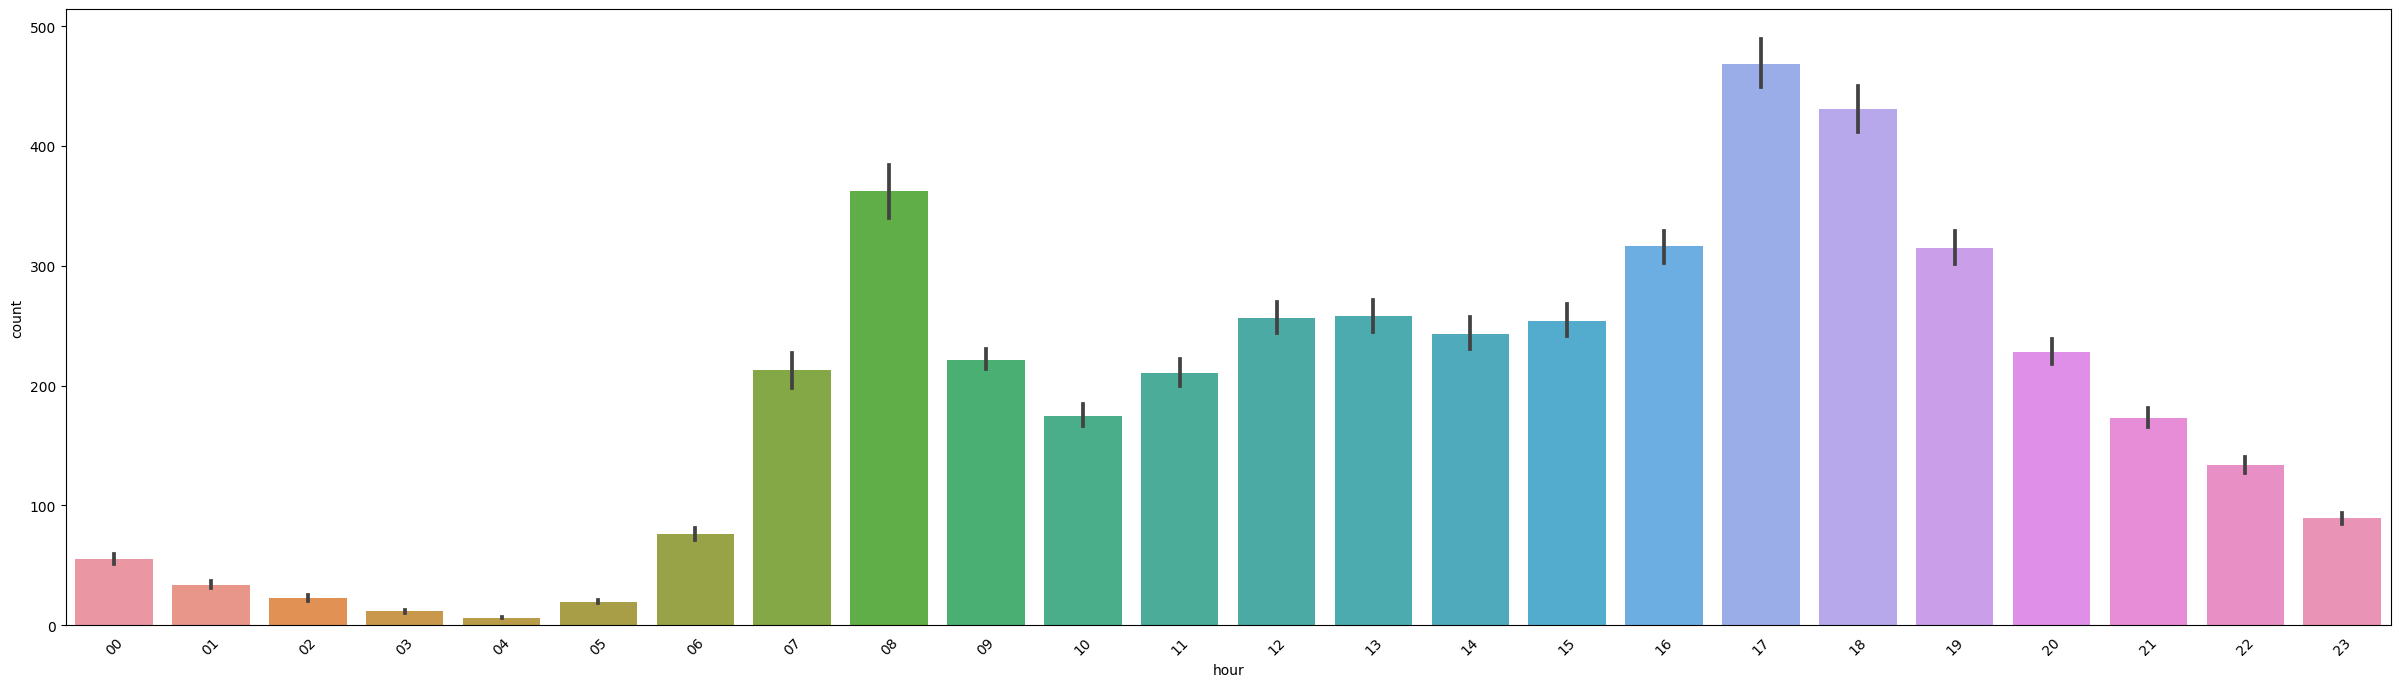

In [ ]:
plt.figure(figsize=(30,8))

ax = sns.barplot(x='hour', y='count',
                  data=train)
ax.tick_params(bottom=False) # x축 눈금 숨기기

plt.xticks(rotation=45)
plt.show()
# hour별 count평균

* hour별로 큰 차이가 있음
* 새벽시간대가 가장 적으며, 출퇴근시간에 가장 많이 있음을 확인

In [ ]:
train.groupby("weekday")["count"].mean()

weekday
Friday       197.844343
Monday       190.390716
Saturday     196.665404
Sunday       180.839772
Thursday     197.296201
Tuesday      189.723847
Wednesday    188.411348
Name: count, dtype: float64

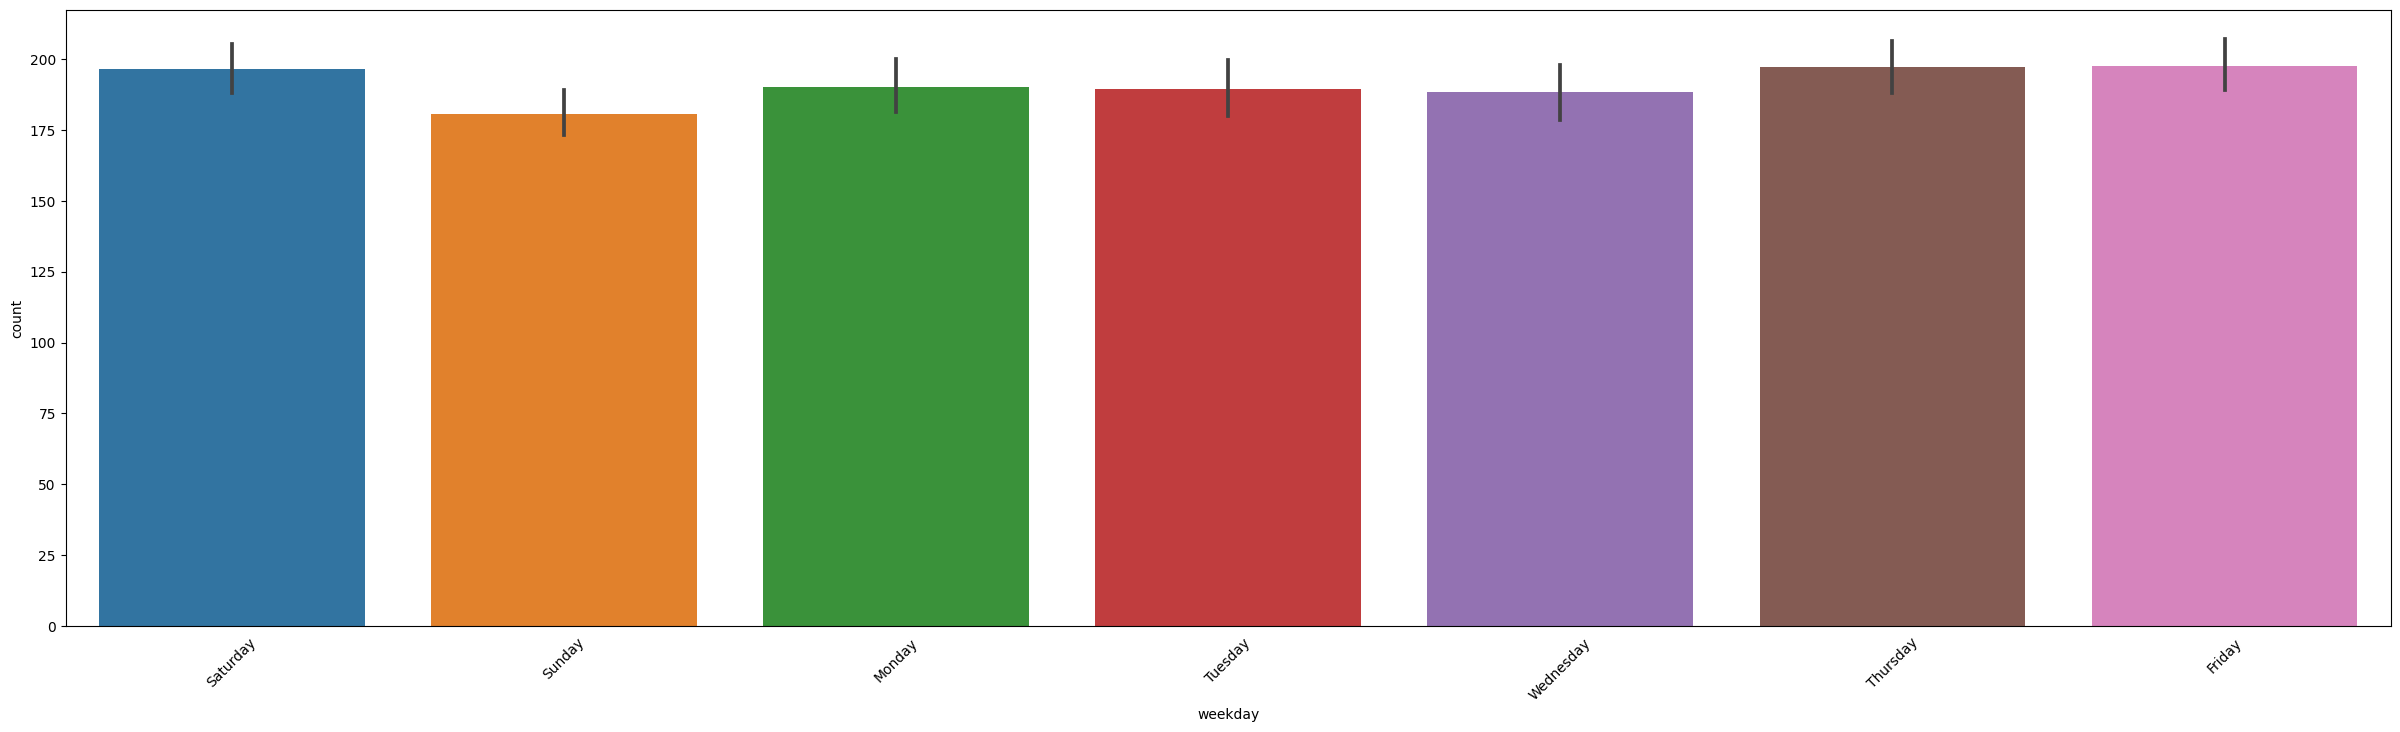

In [ ]:
plt.figure(figsize=(30,8))

ax = sns.barplot(x='weekday', y='count',
                  data=train)
ax.tick_params(bottom=False) # x축 눈금 숨기기

plt.xticks(rotation=45)
plt.show()
# 요일별 count평균

### 상관계수 분석

In [ ]:
train.corr(method= "pearson")

<ipython-input-69-8c8e7a0a04e3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr(method= "pearson")


,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
year,1.000000,-0.004932,0.001800,-0.004234,-0.004797,0.012021,-0.002482,-0.012548,0.061226,0.058540,-0.078606,-0.015221,0.145241,0.264265,0.260403
month,-0.004932,1.000000,0.001974,-0.006818,0.971524,0.001731,-0.003394,0.012144,0.257589,0.264173,0.204537,-0.150192,0.092722,0.169451,0.166862
day,0.001800,0.001974,1.000000,0.001132,0.001729,-0.015877,0.009829,-0.007890,0.015551,0.011866,-0.011335,0.036157,0.014109,0.019111,0.019826
hour,-0.004234,-0.006818,0.001132,1.000000,-0.006546,-0.000354,0.002780,-0.022740,0.145430,0.140343,-0.278011,0.146631,0.302045,0.380540,0.400601
season,-0.004797,0.971524,0.001729,-0.006546,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.012021,0.001731,-0.015877,-0.000354,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.002482,-0.003394,0.009829,0.002780,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,-0.012548,0.012144,-0.007890,-0.022740,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.061226,0.257589,0.015551,0.145430,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.058540,0.264173,0.011866,0.140343,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784


In [ ]:
import numpy as np

<ipython-input-72-8fc7e160b440>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(train.corr(), dtype = np.bool)
<ipython-input-72-8fc7e160b440>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(train.corr(), dtype = np.bool)
<ipython-input-72-8fc7e160b440>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silenc

<Axes: >

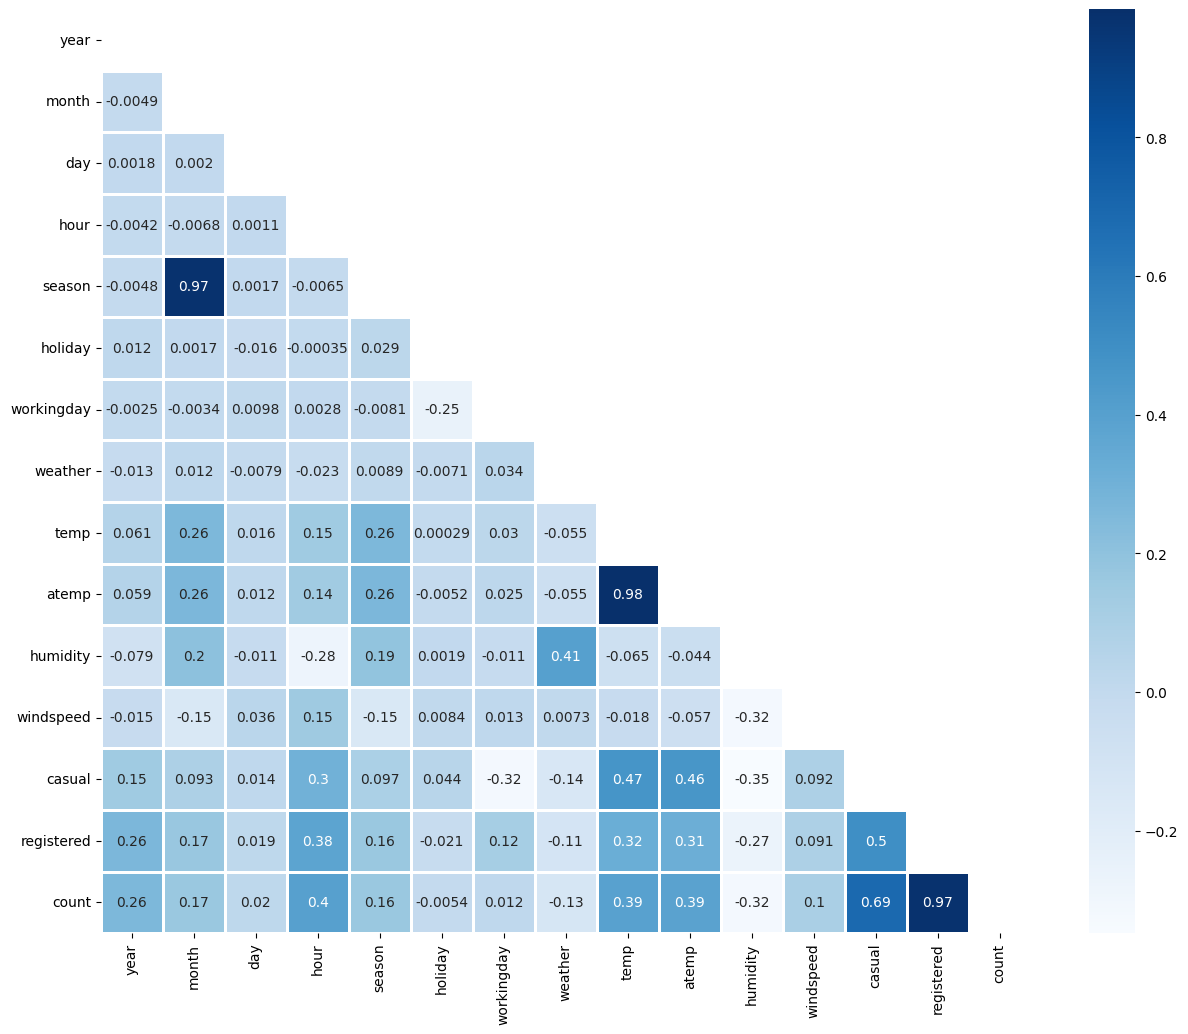

In [ ]:
plt.rcParams['figure.figsize'] = (15,12) # 팔레트 넓게

# 삼각형 마스크 제작
mask = np.zeros_like(train.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(train.corr(method="pearson"),
            cmap = "Blues", # 색상
            annot = True, # 실제값 표시
            linewidth = 2, # 경계면 실선
            mask = mask # 표시하지 않을 마스크 부분을 지정
            )

In [ ]:
from scipy import stats

In [ ]:
seq = ["year", "month", "day", "hour", "season", "holiday",	"workingday",	"weather"	, "temp",	"atemp",	"humidity"	,"windspeed"	,"casual"	,"registered"]

for i in seq:
  a, b = stats.pearsonr(train[i], train["count"])
  print("corr:",a,"p-value:",b)

  if b < 0.05:
    print(i, "컬럼과 count컬럼의 상관계수는 유의미합니다.")
  else:
    print(i,"컬럼과 count컬럼의 상관계수는 유의미하지 않습니다.")
  print("")

stats.pearsonr(train["holiday"], train["count"])

corr: 0.26040329737831547 p-value: 3.242014233178718e-168
year 컬럼과 count컬럼의 상관계수는 유의미합니다.

corr: 0.16686223209772766 p-value: 8.342866666972603e-69
month 컬럼과 count컬럼의 상관계수는 유의미합니다.

corr: 0.019825777342373604 p-value: 0.03859228180768407
day 컬럼과 count컬럼의 상관계수는 유의미합니다.

corr: 0.4006011941468474 p-value: 0.0
hour 컬럼과 count컬럼의 상관계수는 유의미합니다.

corr: 0.1634390165763617 p-value: 4.758934418677683e-66
season 컬럼과 count컬럼의 상관계수는 유의미합니다.

corr: -0.0053929844777743825 p-value: 0.5736923883271028
holiday 컬럼과 count컬럼의 상관계수는 유의미하지 않습니다.

corr: 0.011593866091574393 p-value: 0.22644804226361234
workingday 컬럼과 count컬럼의 상관계수는 유의미하지 않습니다.

corr: -0.12865520103850636 p-value: 2.1111059673232e-41
weather 컬럼과 count컬럼의 상관계수는 유의미합니다.

corr: 0.3944536449672492 p-value: 0.0
temp 컬럼과 count컬럼의 상관계수는 유의미합니다.

corr: 0.3897844366269768 p-value: 0.0
atemp 컬럼과 count컬럼의 상관계수는 유의미합니다.

corr: -0.3173714788765946 p-value: 2.9215416637405304e-253
humidity 컬럼과 count컬럼의 상관계수는 유의미합니다.

corr: 0.10136947021033282 p-value: 2.8984

PearsonRResult(statistic=-0.0053929844777743825, pvalue=0.5736923883271028)

In [ ]:
# r>=0.8이라면 강한 상관 관계 (절대값 기준)
# 0.8> r >= 0.6 상관 관계
# 0.6> r >=0.4 약한 상관 관계
# 0.4 > r 상관관계가 거의 없음

# 그러나 p-value가 0.05 미만일때만 상관계수가 의미를 가진다! (0.05 이상이면 상관계수가 큰 의미 x)

* 피어슨 상관관계 상으로는
* year, month, day, hour, season, weather, temp, atmep, humidity, windspeed, casual, registered 컬럼의 상관계수 결과가 유의미하다고 나옴
* 이 중 year, hour, temp, atmep, humidity, casual, registered가 다른 컬럼에 비해 높은 상관계수를 보임


* 그러나 registered와 casual은 count의 합이므로 구조적으로 높은 상관계수를 가질 수 밖에 없다.
* 따라서 이 둘을 제외한 hour, temp, atmep, humidity가 y값과 관련이 있는 피처다.